In [1]:
from actor_critic_highdim import Agent
import gym
import matplotlib.pyplot as plt
import numpy as np

In [2]:
agent = Agent(alpha=0.000005, beta=0.00001, input_dims=[24], gamma=0.99, n_actions=4, max_action=1)
env = gym.make("BipedalWalker-v3")


score_history = []
num_episodes = 50

for i in range(num_episodes):
    score = 0
    done = False
    observation = env.reset()
    while not done:
        action = agent.choose_action(observation)
        print(action)
        observation_, reward, done, info = env.step(action)
        agent.learn(observation, reward, observation_, done)
        observation = observation_
        score += reward
    score_history.append(score)
    
    score_history.append(score)
    print('episode: ', i,'score: %.2f' % score)



ValueError: too many values to unpack (expected 2)

Text(0.5, 1.0, 'Running average of previous 100 episodes')

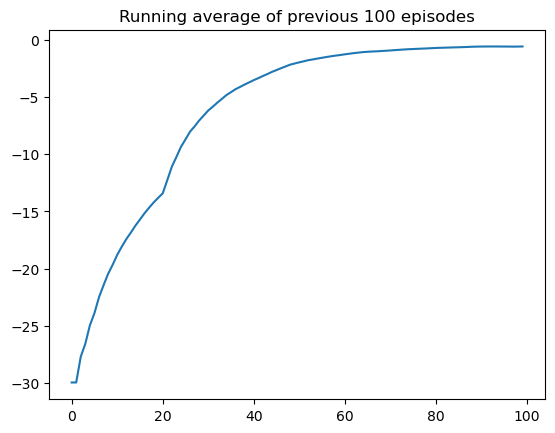

In [3]:
running_avg = np.zeros(len(score_history))
for i in range(len(running_avg)):
    running_avg[i] = np.mean(score_history[max(0, i-20):(i+1)])
plt.plot(range(len(score_history)), running_avg)
plt.title('Running average of previous 100 episodes')